In [1]:
import pandas as pd

#For time series we need different stats module
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing

#For rmse
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('saas.csv')
df['Month_Invoiced'] = pd.to_datetime(df['Month_Invoiced'],infer_datetime_format=True)
df = df.set_index('Month_Invoiced').sort_index()
df=df[['Amount']]
df.head()

,Amount
Month_Invoiced,
2014-01-31,0.0
2014-01-31,10.0
2014-01-31,0.0
2014-01-31,0.0
2014-01-31,5.0


In [3]:
df = df.resample('2D').sum()

In [4]:
def split(df): 
    bound1 = int(df.shape[0]*.6) # 60% train, 20% val, 20% test
    bound2 = int(df.shape[0]*.8)
    
    train = df[:bound1]
    val = df[bound1:bound2]
    test = df[bound2:]
    return train, val, test

In [5]:
train, val, test = split(df)

In [23]:
df.shape[0] == train.shape[0]+val.shape[0]+test.shape[0]

True

array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

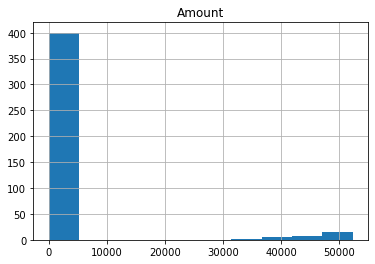

In [7]:
train.hist()

<AxesSubplot:xlabel='Month_Invoiced'>

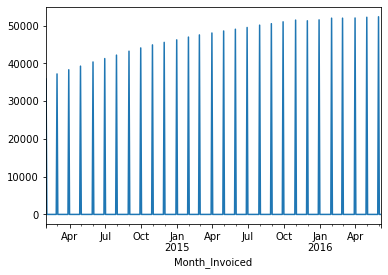

In [8]:
train.Amount.plot()

In [34]:
train.Amount.rolling(15).mean()[-1]

3488.3333333333335

In [10]:
yhat_last = train.Amount[-1]
yhat_simple = round(train.Amount.mean(),2)
yhat_rolling = round(train.Amount[-15:].mean(),2) #Average for the last 15 rows (30 days)


In [11]:
val['yhat_last'] = yhat_last
val['yhat_simple'] = yhat_simple
val['yhat_rolling'] = yhat_rolling

/var/folders/fz/0282wvb93rn0lm_p0nscw1sm0000gn/T/ipykernel_25597/627127564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['yhat_last'] = yhat_last
/var/folders/fz/0282wvb93rn0lm_p0nscw1sm0000gn/T/ipykernel_25597/627127564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['yhat_simple'] = yhat_simple
/var/folders/fz/0282wvb93rn0lm_p0nscw1sm0000gn/T/ipykernel_25597/627127564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [12]:
val

,Amount,yhat_last,yhat_simple,yhat_rolling
Month_Invoiced,,,,
2016-06-07,0.0,0.0,3156.34,3488.33
2016-06-09,0.0,0.0,3156.34,3488.33
2016-06-11,0.0,0.0,3156.34,3488.33
2016-06-13,0.0,0.0,3156.34,3488.33
2016-06-15,0.0,0.0,3156.34,3488.33
...,...,...,...,...
2017-03-10,0.0,0.0,3156.34,3488.33
2017-03-12,0.0,0.0,3156.34,3488.33
2017-03-14,0.0,0.0,3156.34,3488.33


<AxesSubplot:xlabel='Month_Invoiced'>

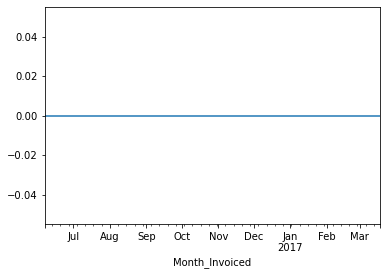

In [13]:
val.yhat_last.plot()

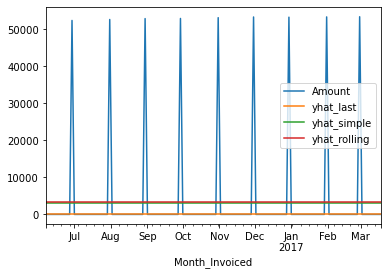

In [14]:
for col in val.columns:
    val[col].plot(label=col)
    plt.legend()

In [15]:
print("RMSE")
for col in val.columns:
    print(f'{col} : {round(mean_squared_error(val[col],val.Amount),2)}') #Calculate rmse for each of our columns

RMSE
Amount : 0.0
yhat_last : 177364581.99
yhat_simple : 166236312.02
yhat_rolling : 166223909.55


In [16]:
model = Holt(train.Amount, exponential = False)

In [17]:
model.fit(smoothing_level = .1, 
                      smoothing_slope = .1, 
                      optimized = False)

/var/folders/fz/0282wvb93rn0lm_p0nscw1sm0000gn/T/ipykernel_25597/2284595655.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level = .1,


In [22]:
model.predict(start = val.Amount.index[0], end = val.Amount.index[-1])

TypeError: predict() missing 1 required positional argument: 'params'

In [21]:
val.Amount.index[0]

Timestamp('2016-06-07 00:00:00', freq='2D')